# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
api_key = "be3e264cb040dab2ab5013d13c51bec8"
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lazaro cardenas
Processing Record 2 of Set 1 | san julian
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | santiago de veraguas
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | eagle river
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | puerto deseado
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | mbandaka
Processing Record 18 of Set 1 | fisterra
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | presidente epitacio
Processing Record 21 of Set 1 | xilin hot
Processing Record 22 of

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lazaro cardenas,17.9583,-102.2000,295.94,76,0,2.18,MX,1707017733
1,san julian,21.0167,-102.1667,283.94,28,0,3.14,MX,1707017932
2,isafjordur,66.0755,-23.1240,268.33,89,99,9.05,IS,1707017933
3,waitangi,-43.9535,-176.5597,291.38,75,7,4.02,NZ,1707017934
4,adamstown,-25.0660,-130.1015,298.58,77,100,2.32,PN,1707017934


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\output_data\cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,295.94,76,0,2.18,MX,1707017733
1,san julian,21.0167,-102.1667,283.94,28,0,3.14,MX,1707017932
2,isafjordur,66.0755,-23.1240,268.33,89,99,9.05,IS,1707017933
3,waitangi,-43.9535,-176.5597,291.38,75,7,4.02,NZ,1707017934
4,adamstown,-25.0660,-130.1015,298.58,77,100,2.32,PN,1707017934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

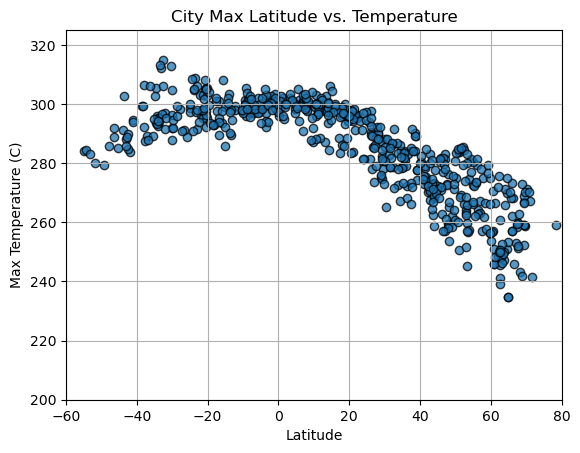

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60, 80)
plt.ylim(200, 325)
plt.grid(True)


# Save the figure
plt.savefig(r'C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\this.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

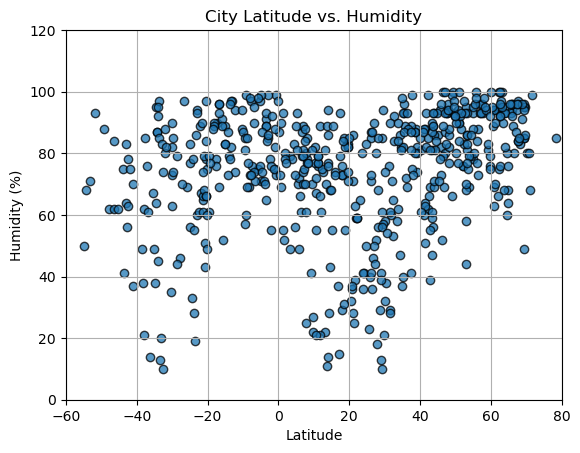

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 80)
plt.ylim(0, 120)
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\that.png')
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

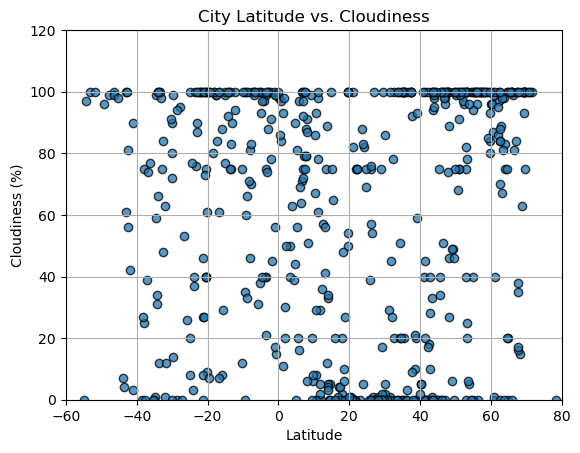

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 80)
plt.ylim(0, 120)
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\those.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

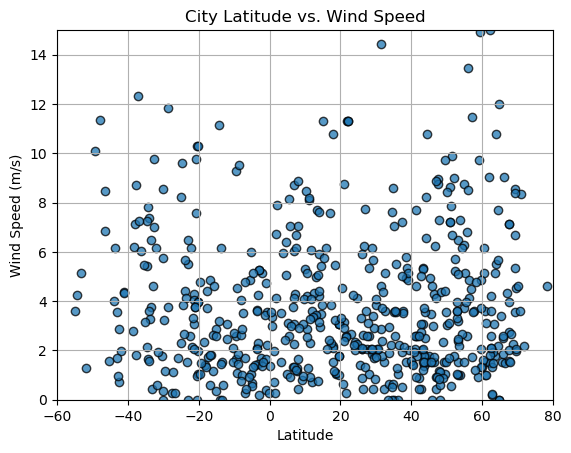

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60, 80)
plt.ylim(0, 15)
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\06-Python-APIs\Challenge\them.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lazaro cardenas,17.9583,-102.2000,295.94,76,0,2.18,MX,1707017733
1,san julian,21.0167,-102.1667,283.94,28,0,3.14,MX,1707017932
2,isafjordur,66.0755,-23.1240,268.33,89,99,9.05,IS,1707017933
5,santiago de veraguas,8.1000,-80.9833,297.93,85,91,0.45,PA,1707017935
7,eagle river,45.9172,-89.2443,271.06,73,0,0.00,US,1707017659


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,291.38,75,7,4.02,NZ,1707017934
4,adamstown,-25.0660,-130.1015,298.58,77,100,2.32,PN,1707017934
6,tolanaro,-25.0319,46.9987,297.19,83,20,8.23,MG,1707017935
8,ushuaia,-54.8000,-68.3000,283.96,50,0,3.60,AR,1707017937
11,puerto deseado,-47.7503,-65.8938,285.73,62,99,11.34,AR,1707017938


###  Temperature vs. Latitude Linear Regression Plot

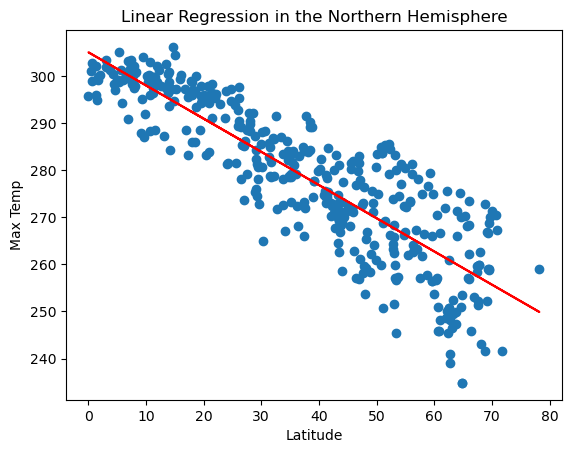

R-value: -0.8685454784780664


In [42]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']


slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression in the Northern Hemisphere')
plt.show()
print("R-value:", r_value)

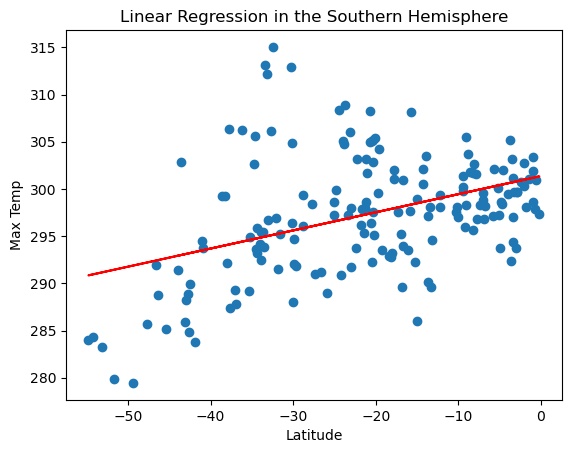

R-value: 0.41564096992626365


In [43]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression in the Southern Hemisphere')
plt.show()


print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

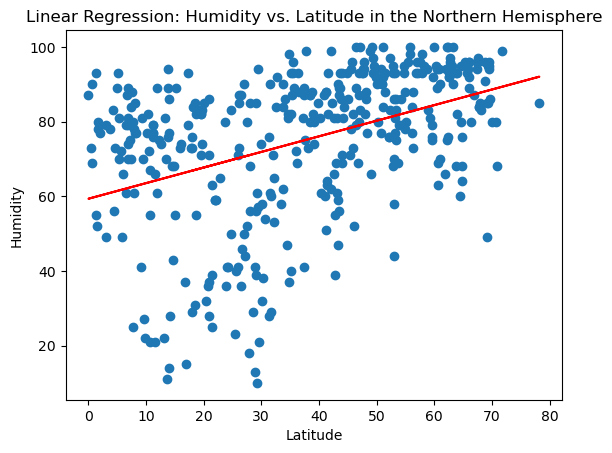

R-value: 0.4148583829471268


In [44]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Humidity vs. Latitude in the Northern Hemisphere')
plt.show()

print("R-value:", r_value)

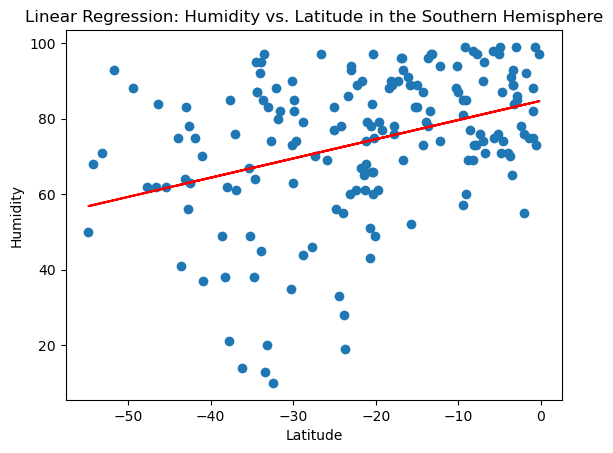

R-value: 0.3649796033150044


In [45]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']


slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Humidity vs. Latitude in the Southern Hemisphere')
plt.show()


print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

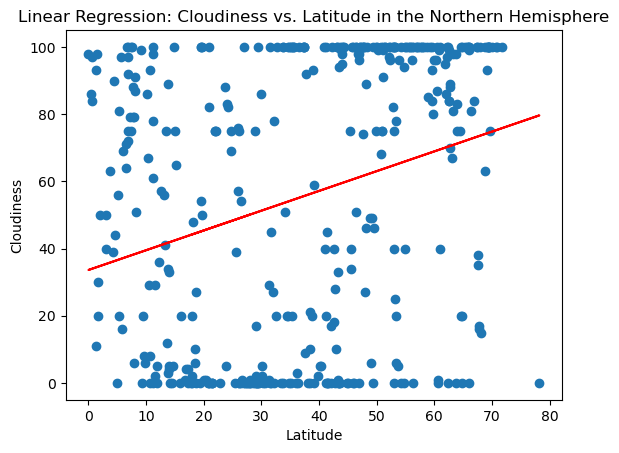

R-value: 0.28174082374869935


In [46]:

# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Cloudiness vs. Latitude in the Northern Hemisphere')
plt.show()

print("R-value:", r_value)

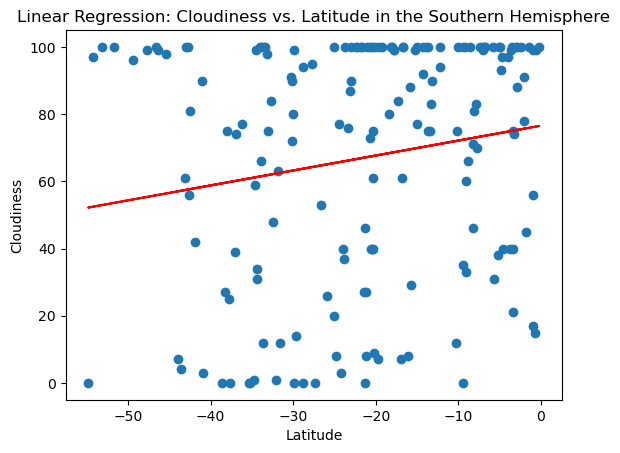

R-value: 0.17184996129299765


In [47]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Cloudiness vs. Latitude in the Southern Hemisphere')
plt.show()

print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

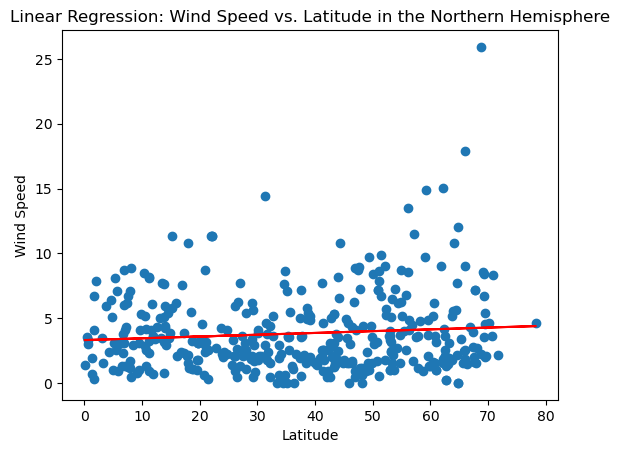

R-value: 0.08944268644427104


In [48]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Wind Speed vs. Latitude in the Northern Hemisphere')
plt.show()


print("R-value:", r_value)

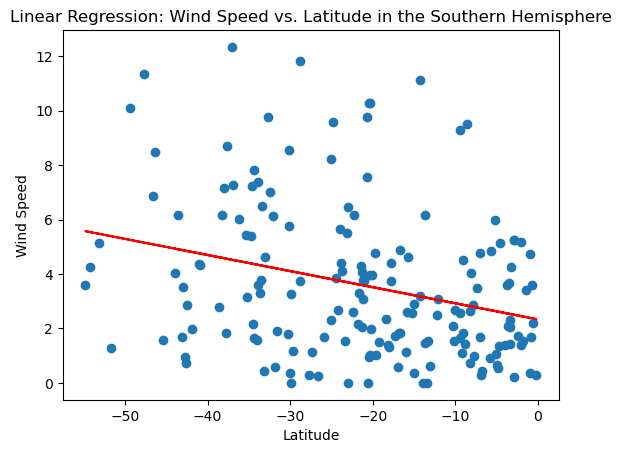

R-value: -0.2904723440334306


In [49]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x, y)


regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Wind Speed vs. Latitude in the Southern Hemisphere')
plt.show()

print("R-value:", r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both in the Northern and Southern Hemispheres, there was a weak positive correlation between latitude and wind speed. The R-values are approximately 0.08 in the Northern Hemisphere and -0.29 in the Southern Hemisphere, suggesting a weak positive relationship in the Northern Hemisphere and a weak negative relationship in the Southern Hemisphere.